In [16]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
# import sklearn
import sklearn

import warnings
warnings.filterwarnings('ignore')

sns.set()

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os



In [17]:
wine=pd.read_csv("WineQT.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [18]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [19]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
#split the data based on the quality
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in split.split(wine,wine["quality"]):
    strat_train_set=wine.loc[train_index]
    strat_test_set=wine.loc[test_index]

In [21]:
strat_train_set.shape

(914, 13)

In [22]:
strat_test_set.shape

(229, 13)

In [23]:
strat_train_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
819,8.3,0.60,0.25,2.2,0.118,9.0,38.0,0.99616,3.15,0.53,9.8,5,1155
357,10.5,0.24,0.42,1.8,0.077,6.0,22.0,0.99760,3.21,1.05,10.8,7,504
385,9.5,0.46,0.49,6.3,0.064,5.0,17.0,0.99880,3.21,0.73,11.0,6,541
1057,5.6,0.62,0.03,1.5,0.080,6.0,13.0,0.99498,3.66,0.62,10.1,4,1480
161,8.9,0.59,0.50,2.0,0.337,27.0,81.0,0.99640,3.04,1.61,9.5,6,226


In [24]:
strat_test_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
96,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,142
442,8.8,0.60,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,9.1,5,626
872,7.6,0.43,0.29,2.1,0.075,19.0,66.0,0.99718,3.40,0.64,9.5,5,1232
764,6.8,0.48,0.08,1.8,0.074,40.0,64.0,0.99529,3.12,0.49,9.6,5,1085
570,7.7,0.60,0.00,2.6,0.055,7.0,13.0,0.99639,3.38,0.56,10.8,5,793


## Discover And Visualize the Data to Gain Insights


In [25]:
wine_strat=strat_train_set.copy()


In [26]:
wine_strat.quality.value_counts()

5    386
6    370
7    114
4     26
8     13
3      5
Name: quality, dtype: int64

In [27]:
wine_strat.var()

fixed acidity                3.048502
volatile acidity             0.031949
citric acid                  0.038195
residual sugar               1.417207
chlorides                    0.002512
free sulfur dioxide        100.435881
total sulfur dioxide      1099.586127
density                      0.000004
pH                           0.023743
sulphates                    0.030193
alcohol                      1.134341
quality                      0.650397
Id                      215957.377876
dtype: float64

In [28]:
wine_strat.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.232742,0.660505,0.171825,0.103658,-0.173419,-0.117527,0.688957,-0.682259,0.181522,-0.063264,0.114196,-0.283038
volatile acidity,-0.232742,1.000000,-0.543376,-0.005361,0.058764,-0.006254,0.050150,0.029036,0.221685,-0.271467,-0.202273,-0.402429,-0.014446
citric acid,0.660505,-0.543376,1.000000,0.219256,0.246219,-0.047119,0.062732,0.377406,-0.545095,0.343536,0.108612,0.232665,-0.153647
residual sugar,0.171825,-0.005361,0.219256,1.000000,0.034139,0.148753,0.218981,0.318324,-0.103347,0.014505,0.148980,0.040086,-0.072966
chlorides,0.103658,0.058764,0.246219,0.034139,1.000000,0.001063,0.041765,0.200884,-0.288175,0.412165,-0.234476,-0.128679,-0.103033
free sulfur dioxide,-0.173419,-0.006254,-0.047119,0.148753,0.001063,1.000000,0.662472,-0.067855,0.065257,0.049640,-0.055020,-0.045641,0.061194
total sulfur dioxide,-0.117527,0.050150,0.062732,0.218981,0.041765,0.662472,1.000000,0.031350,-0.073874,0.064874,-0.173822,-0.156308,-0.137273
density,0.688957,0.029036,0.377406,0.318324,0.200884,-0.067855,0.031350,1.000000,-0.329914,0.162958,-0.479460,-0.174787,-0.378344
pH,-0.682259,0.221685,-0.545095,-0.103347,-0.288175,0.065257,-0.073874,-0.329914,1.000000,-0.226281,0.190705,-0.066657,0.133603
sulphates,0.181522,-0.271467,0.343536,0.014505,0.412165,0.049640,0.064874,0.162958,-0.226281,1.000000,0.072020,0.245382,-0.091334


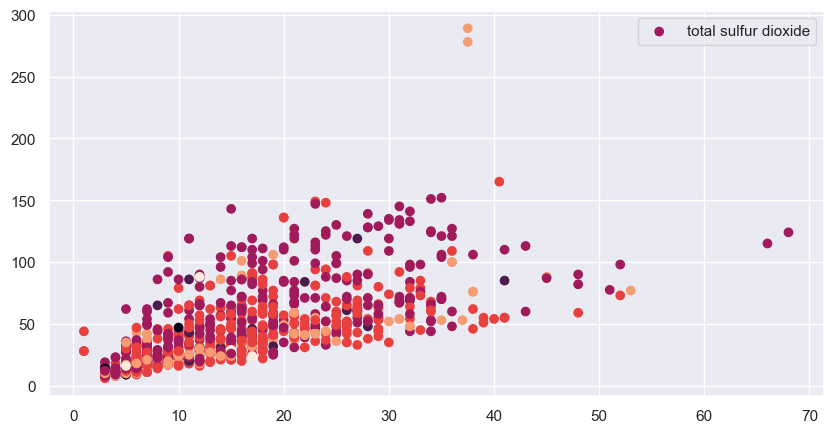

In [29]:
plt.figure(figsize=(10,5))


plt.scatter(x='free sulfur dioxide', y='total sulfur dioxide', c='quality', data=wine_strat)
plt.legend();

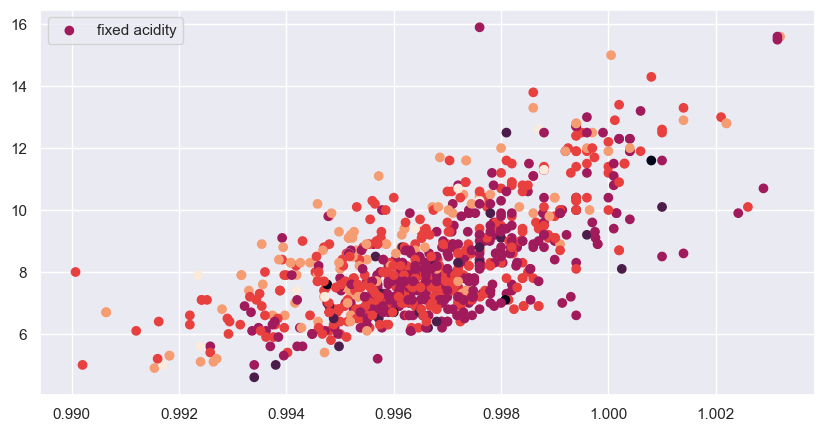

In [30]:
plt.figure(figsize=(10,5))

plt.scatter(x='density',y='fixed acidity', c='quality', data=wine_strat)
plt.legend();